<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/forwardModels/DiscreteForwardModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

## Discrete Forward Models

This notebook supports ideas developed in Chapter 2 of *Computational Imaging*. Specifically we consider the structure of discrete forward models for continuous signals. 

#### initialization code

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-sil-gentiumplus fonts-sil-gentiumplus-compact
  fonts-stix fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcups

## System Description

Consider $f(x)\in V_B$. For example, we might consider
$$f(x)=\cos (\frac{2\pi B}{3}x) e^{-\frac{ B^2 x^2}{1000} }
$$
as illustrated below

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '${\\hat f}(u)$')

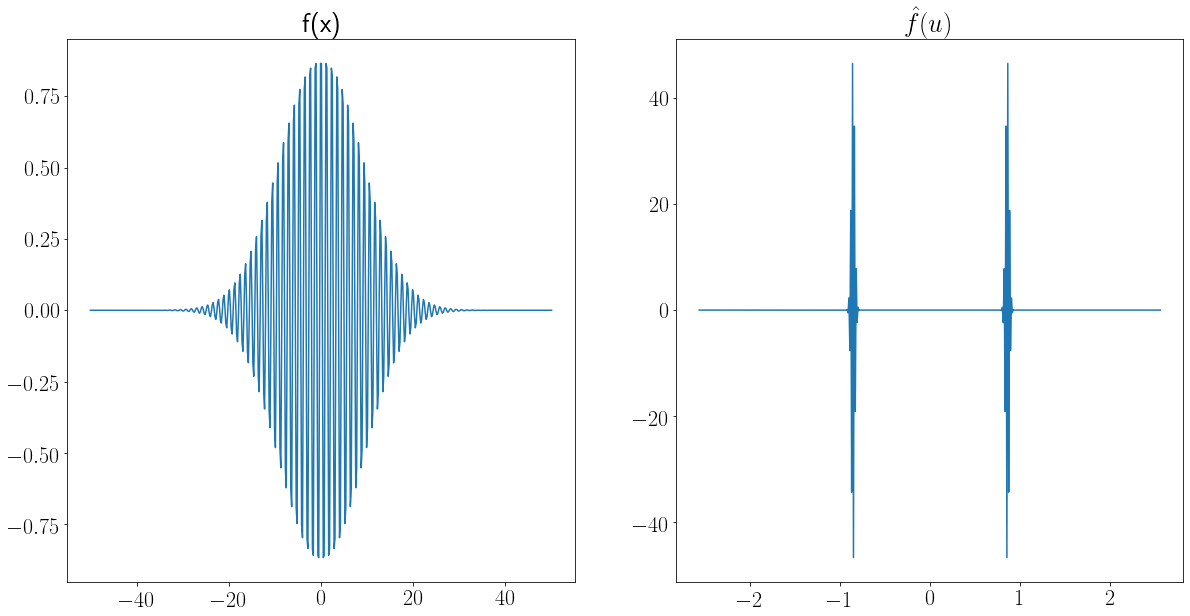

In [4]:
N=512
X=50
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*B*x/3.)*np.exp(-(B**2)*x**2/1000)
  return f
plt.subplot(1,2,1)
plt.plot(xrange,f(xrange))
plt.title('f(x)')
plt.subplot(1,2,2)
plt.plot(urange,np.fft.fftshift(np.fft.fft(f(xrange))))
plt.title('${\hat f}(u)$')

If we sample above nyquist then the signal will be faithfully reconstructed, if the sampling rante is lower than the nyquist rate we will see aliasing. In the present case, the maximum spatial frequency is just under 1, meaning that the sampling period should be less than .5. If we sample at a lower rate, say delta=1, with a delta function impluse response, the measured data will look like this:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '${\\hat g}(u)$')

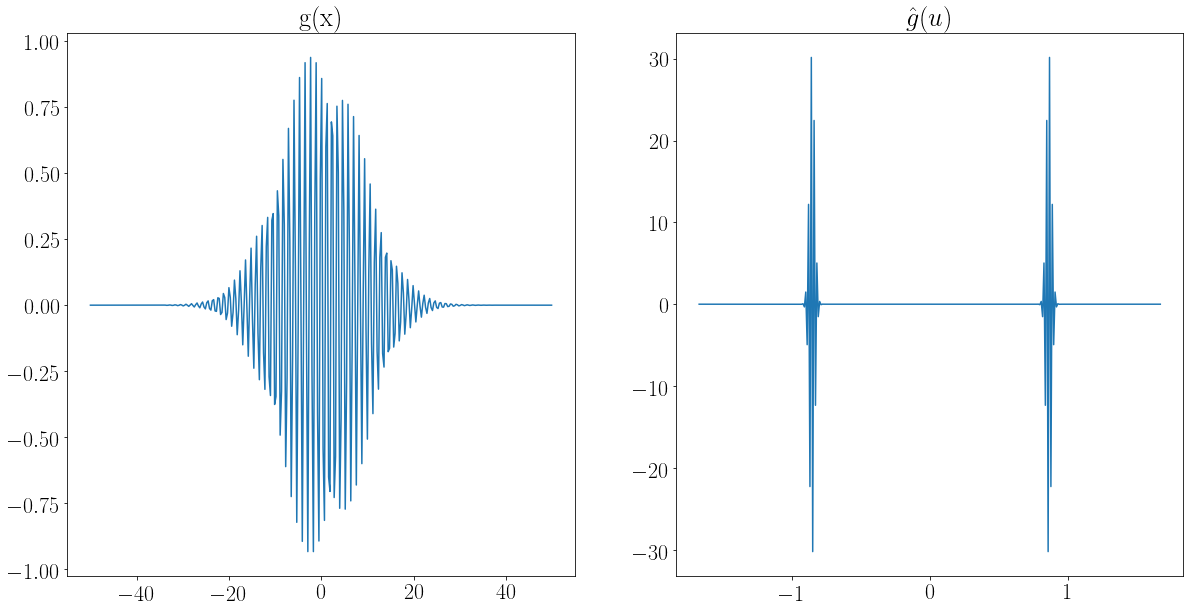

In [17]:
N=512
X=50
B=N/(4*X)
xrange=np.arange(-X,X,.3)
bp=len(xrange)/(4*X)
urange=np.linspace(-bp,bp,len(xrange))
def g(x):
  g=np.cos(2*np.pi*B*x/3.)*np.exp(-(B**2)*x**2/1000)
  return g
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.subplot(1,2,1)
plt.plot(xrange,f(xrange))
plt.title('g(x)')
plt.subplot(1,2,2)
plt.plot(urange,np.fft.fftshift(np.fft.fft(f(xrange))))
plt.title('${\hat g}(u)$')

In [7]:
xrange[5]

-45